## Importación de las librerias necesarias

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime
import os
import sys
import re
import argparse
from collections import defaultdict
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from linearmodels import PanelOLS


## Lectura de datos

In [25]:
data=pd.read_excel(r"C:\Users\hugot\OneDrive - Universidad Pontificia Comillas\5\TFGS\BA\BBDD\Demigpaises\FINAL.xlsx")

## Cambio de nombres de variables y creacion de conjuntos para facilitar la implementación

In [26]:
data.columns = ["country", "year", "control", "doc_identificacion", "detenciones", "resp_traficantes", "resp_empleadores", "otras_resp", "permiso_visita", "visa_trabajo", "permiso_residencia", "sistemas_puntos", "cuotas", "regularizaciones", "prohibiciones_entrada", "programas_reclut", "relocalizaciones", "ac_libre_mobilidad", "vivienda_integración", "benef_sociales", "dchos_politicos", "residencia_permanente", "acc_ciudadania", "reintegracion_expuls", "acuerdos_readmision", "expulsiones", "permisos_salida", "competencias_institucionales", "planes_accion", "elementos_contx", "gdp_growth", "nmr1", "nmr"]
data.drop(["nmr1", "benef_sociales", "planes_accion", "elementos_contx"], axis=1, inplace=True)

country=data["country"]
year=data["year"]
variables_mig_n=["control", "doc_identificacion", "detenciones", "resp_traficantes", "resp_empleadores", "otras_resp", "permiso_visita", "visa_trabajo", "permiso_residencia", "sistemas_puntos", "cuotas", "regularizaciones", "prohibiciones_entrada", "programas_reclut", "relocalizaciones", "ac_libre_mobilidad", "vivienda_integración", "dchos_politicos", "residencia_permanente", "acc_ciudadania", "reintegracion_expuls", "acuerdos_readmision", "expulsiones", "permisos_salida", "competencias_institucionales"]
variables_mig=data[variables_mig_n]
variables_n=["control", "doc_identificacion", "detenciones", "resp_traficantes", "resp_empleadores", "otras_resp", "permiso_visita", "visa_trabajo", "permiso_residencia", "sistemas_puntos", "cuotas", "regularizaciones", "prohibiciones_entrada", "programas_reclut", "relocalizaciones", "ac_libre_mobilidad", "vivienda_integración", "dchos_politicos", "residencia_permanente", "acc_ciudadania", "reintegracion_expuls", "acuerdos_readmision", "expulsiones", "permisos_salida", "competencias_institucionales", "gdp_growth"]
variables=data[variables_n]
gdp=data["gdp_growth"]
nmr=data["nmr"]

# Evolucion de la media de las políticas migratorias por año

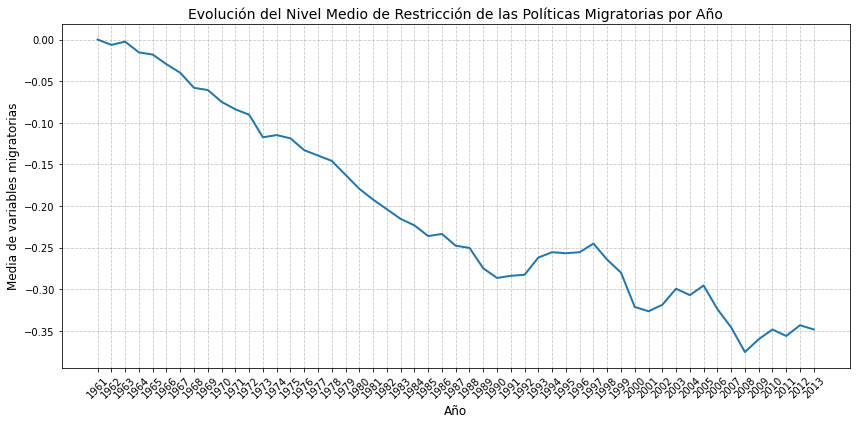

In [27]:
yearly_means = data[variables_mig_n].groupby(data['year']).mean().mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(yearly_means.index, yearly_means.values, linewidth=2)
plt.title('Evolución del Nivel Medio de Restricción de las Políticas Migratorias por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Media de variables migratorias', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_means.index, rotation=45)
plt.tight_layout()
plt.show()

## Tabla con los valores por año

In [28]:
yearly_means_table = pd.DataFrame(yearly_means).round(3)
yearly_means_table.columns = ['Media de variables migratorias']
display(yearly_means_table)

,Media de variables migratorias
year,
1961,0.000
1962,-0.006
1963,-0.003
1964,-0.015
1965,-0.018
1966,-0.030
1967,-0.040
1968,-0.058
1969,-0.061


## Evolución de la media de crecimiento del PIB por año

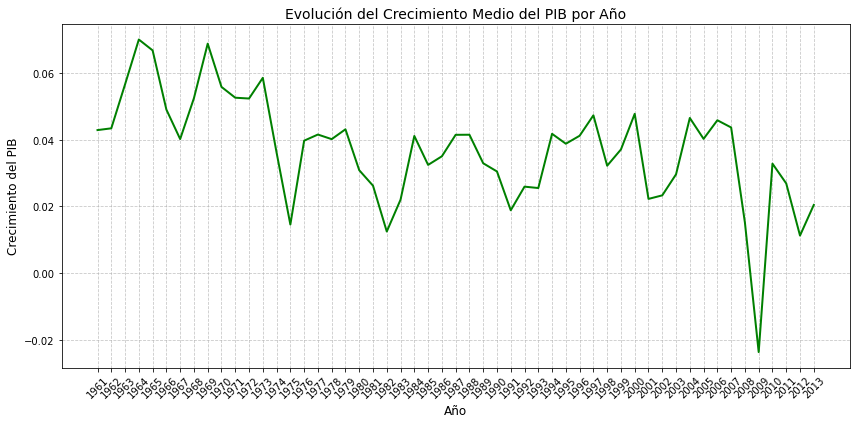

In [29]:
yearly_gdp = data.groupby('year')['gdp_growth'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_gdp.index, yearly_gdp.values, linewidth=2, color='green')
plt.title('Evolución del Crecimiento Medio del PIB por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Crecimiento del PIB', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_gdp.index, rotation=45)
plt.tight_layout()
plt.show()

## Tabla con los valores por año

In [30]:
yearly_gdp_table = pd.DataFrame(yearly_gdp).round(3)
yearly_gdp_table.columns = ['Media de crecimiento del PIB']
display(yearly_gdp_table)

,Media de crecimiento del PIB
year,
1961,0.043
1962,0.043
1963,0.057
1964,0.070
1965,0.067
1966,0.049
1967,0.040
1968,0.052
1969,0.069


# Evolución de la tasa neta de migración por año

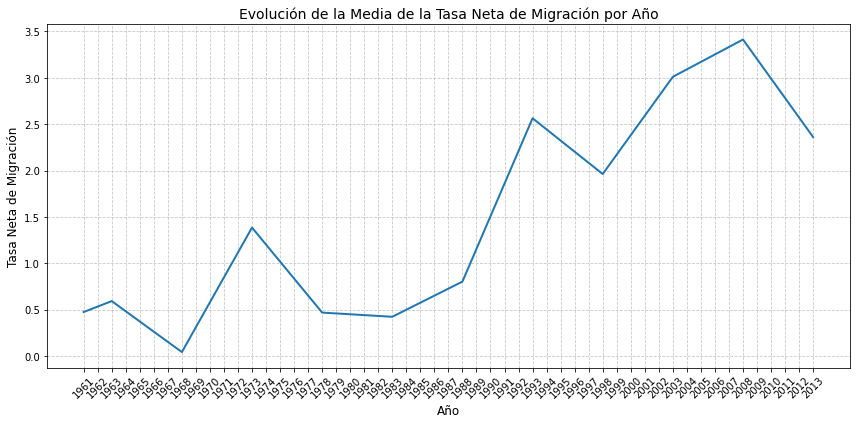

In [31]:
yearly_nmr = data.groupby('year')['nmr'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_nmr.index, yearly_nmr.values, linewidth=2)
plt.title('Evolución de la Media de la Tasa Neta de Migración por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa Neta de Migración', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_nmr.index, rotation=45)
plt.tight_layout()
plt.show()

## Tabla con los valores por año

In [32]:
yearly_nmr_table = pd.DataFrame(yearly_nmr).round(3)
yearly_nmr_table.columns = ['Media de tasa de migracion neta']
display(yearly_nmr_table)

,Media de tasa de migracion neta
year,
1961,0.474
1962,0.532
1963,0.591
1964,0.481
1965,0.371
1966,0.261
1967,0.151
1968,0.041
1969,0.310


## Matriz de correlación entre las variables

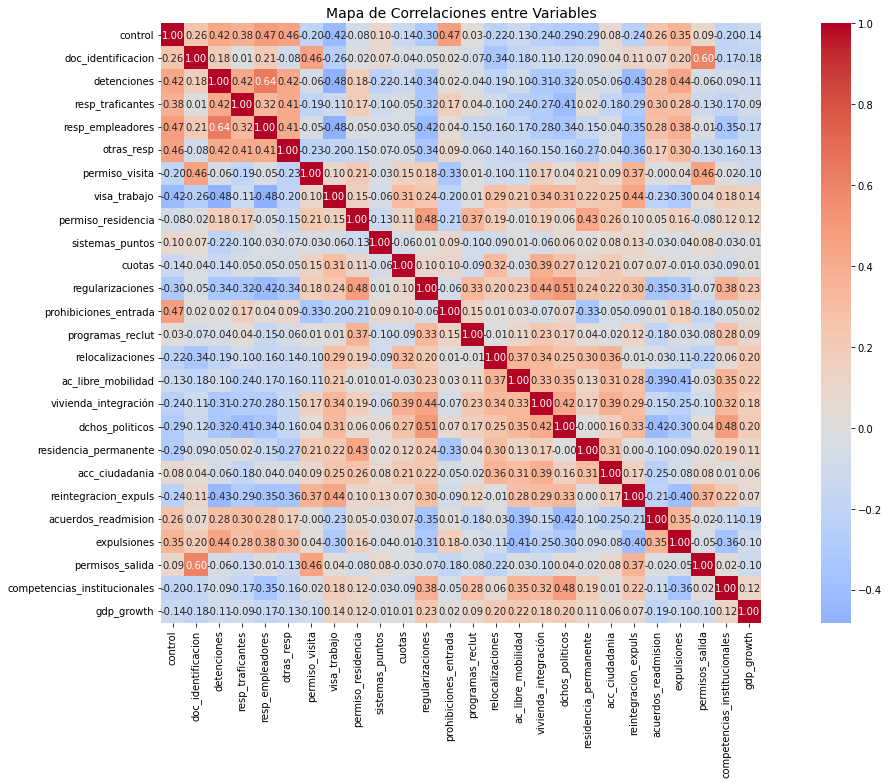

In [33]:
correlation_matrix = variables.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)

plt.title('Mapa de Correlaciones entre Variables', fontsize=14)
plt.tight_layout()
plt.show()

# Correlación entre la media de las variables migratorias, crecimiento del PIB y Tasa de Migracion Neta

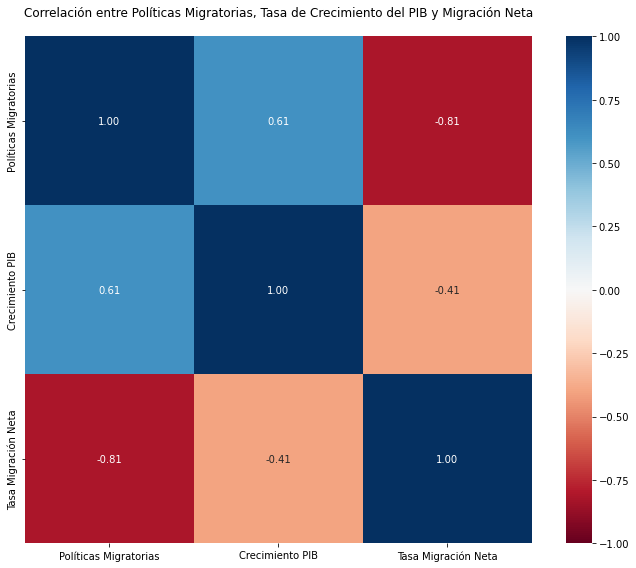

In [34]:
mean_mig_policies = data[variables_mig_n].mean(axis=1)

correlation_df = pd.DataFrame({
     'Políticas Migratorias': yearly_means, 
    'Crecimiento PIB': yearly_gdp,  
    'Tasa Migración Neta': yearly_nmr 
})

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='RdBu',
            vmin=-1, vmax=1,
            center=0,
            fmt='.2f',
            square=True)

plt.title('Correlación entre Políticas Migratorias, Tasa de Crecimiento del PIB y Migración Neta', pad=20)
plt.tight_layout()
plt.show()

# PCA

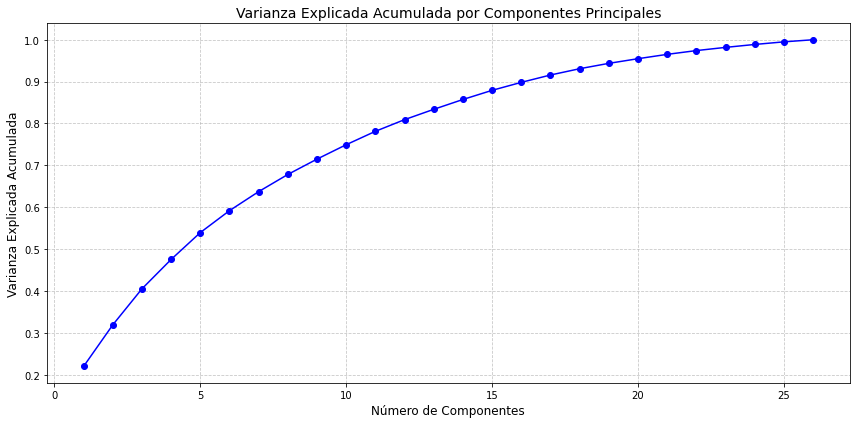


Varianza explicada por cada componente:
Componente 1: 0.2198 (21.98%)
Componente 2: 0.0992 (9.92%)
Componente 3: 0.0861 (8.61%)
Componente 4: 0.0702 (7.02%)
Componente 5: 0.0641 (6.41%)
Componente 6: 0.0524 (5.24%)
Componente 7: 0.0454 (4.54%)
Componente 8: 0.0410 (4.10%)
Componente 9: 0.0367 (3.67%)
Componente 10: 0.0344 (3.44%)
Componente 11: 0.0320 (3.20%)
Componente 12: 0.0279 (2.79%)
Componente 13: 0.0246 (2.46%)
Componente 14: 0.0235 (2.35%)
Componente 15: 0.0219 (2.19%)
Componente 16: 0.0190 (1.90%)
Componente 17: 0.0176 (1.76%)
Componente 18: 0.0150 (1.50%)
Componente 19: 0.0128 (1.28%)
Componente 20: 0.0111 (1.11%)
Componente 21: 0.0104 (1.04%)
Componente 22: 0.0090 (0.90%)
Componente 23: 0.0076 (0.76%)
Componente 24: 0.0070 (0.70%)
Componente 25: 0.0062 (0.62%)
Componente 26: 0.0051 (0.51%)

Varianza explicada acumulada:
Hasta componente 1: 0.2198 (21.98%)
Hasta componente 2: 0.3190 (31.90%)
Hasta componente 3: 0.4051 (40.51%)
Hasta componente 4: 0.4753 (47.53%)
Hasta compon

In [35]:
variables_pca = variables

scaler = StandardScaler()
variables_scaled = scaler.fit_transform(variables_pca)

pca = PCA()
pca_result = pca.fit_transform(variables_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.title('Varianza Explicada Acumulada por Componentes Principales', fontsize=14)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Explicada Acumulada', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nVarianza explicada por cada componente:")
for i, var in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {var:.4f} ({var*100:.2f}%)")

print("\nVarianza explicada acumulada:")
for i, var in enumerate(cumulative_variance_ratio):
    print(f"Hasta componente {i+1}: {var:.4f} ({var*100:.2f}%)")

## Vectores de cargas para las componentes principales seleccionadas (10)

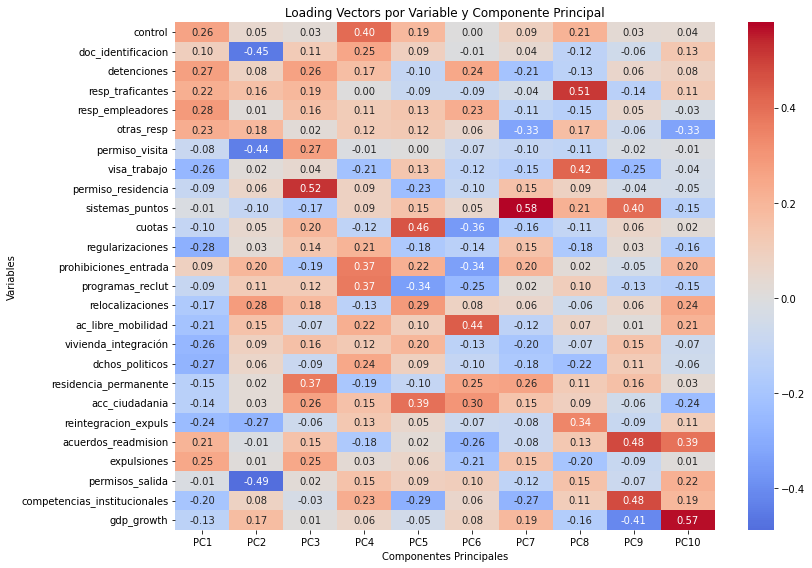

In [36]:
n_components = 10
pca_10 = PCA(n_components=n_components)
pca_10_result = pca_10.fit_transform(variables_scaled)
loading_vectors = pca_10.components_


loading_df = pd.DataFrame(
    loading_vectors.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=variables_pca.columns
)

plt.figure(figsize=(12, 8))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Loading Vectors por Variable y Componente Principal')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

# Regresión usando Componentes Principales

In [37]:
X_pca_reg = pd.DataFrame(pca_10_result, columns=[f'PC{i+1}' for i in range(n_components)])
X_pca_reg['pais'] = country
X_pca_reg['year'] = year
X_pca_reg['nmr'] = nmr
X_pca_reg = X_pca_reg.set_index(['pais', 'year'])

Y = X_pca_reg['nmr']
X = X_pca_reg[[f'PC{i+1}' for i in range(n_components)]]
X = sm.add_constant(X)

modelo_panel = PanelOLS(Y, X, entity_effects=True, time_effects=False)
resultados = modelo_panel.fit()

print(resultados.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    nmr   R-squared:                        0.1599
Estimator:                   PanelOLS   R-squared (Between):             -0.1094
No. Observations:                1643   R-squared (Within):               0.1599
Date:                Thu, Apr 10 2025   R-squared (Overall):              0.0446
Time:                        18:25:09   Log-likelihood                   -3765.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      30.488
Entities:                          31   P-value                           0.0000
Avg Obs:                       53.000   Distribution:                 F(10,1602)
Min Obs:                       53.000                                           
Max Obs:                       53.000   F-statistic (robust):             30.488
                            

## Vectores de cargas de las componentes principales significativas

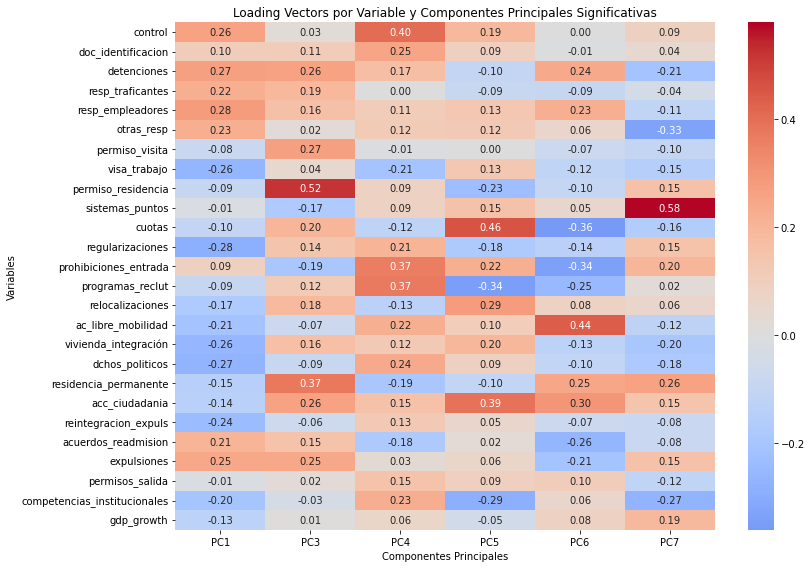

In [38]:
selected_pcs = ['PC1', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
loading_df_selected = loading_df[selected_pcs]

plt.figure(figsize=(12, 8))
sns.heatmap(loading_df_selected, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Loading Vectors por Variable y Componentes Principales Significativas')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

## Cálculo de los efectos netos de cada variable original

In [39]:
coef_pcs = resultados.params[['PC1', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]
selected_loadings = pca.components_[[0,2,3,4,5,6]]

efectos = []
for i in range(len(variables_n)):
    efecto = 0
    for j, pc in enumerate(['PC1', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']):
        loading = round(selected_loadings[j][i], 2)
        coef = coef_pcs[pc]
        efecto += loading * coef
    efectos.append(efecto)

df_efectos = pd.DataFrame({
    'Variable': variables_n,
    'Efecto': efectos
})

print("\nEfectos totales por variable:")
print(df_efectos)


Efectos totales por variable:
                        Variable    Efecto
0                        control  0.046077
1             doc_identificacion  0.032867
2                    detenciones -0.018725
3               resp_traficantes  0.194481
4               resp_empleadores -0.042967
5                     otras_resp -0.083915
6                 permiso_visita  0.042697
7                   visa_trabajo -0.081430
8             permiso_residencia  0.237867
9                sistemas_puntos  0.072368
10                        cuotas  0.065378
11              regularizaciones  0.051660
12         prohibiciones_entrada  0.130433
13              programas_reclut  0.150530
14              relocalizaciones -0.088398
15            ac_libre_mobilidad -0.429950
16          vivienda_integración -0.124839
17               dchos_politicos -0.197813
18         residencia_permanente  0.039897
19                acc_ciudadania -0.202962
20          reintegracion_expuls -0.135167
21           acuerdos_r

## Visualización de los efectos netos de cada variable original

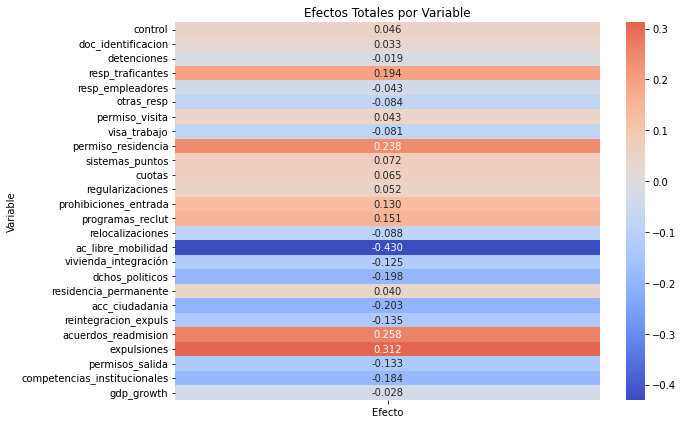

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_efectos.set_index('Variable'), cmap='coolwarm', center=0, annot=True, fmt='.3f')
plt.title('Efectos Totales por Variable')
plt.tight_layout()
plt.show()